In [1]:
import math
import random
import matplotlib.pyplot as plt

dt=1
s_safe=8
v_max=40
p=0.3

In [2]:
class Cell:
    def __init__(self,ID=0,CL=8,X=0,V=30,T=3600):
        self.ID=ID
        self.l=CL
        self.x=[X for t in range(T)]
        self.v=[V for t in range(T)]

In [3]:
class Lane:
    def __init__(self,ID=0,LL=1000,Circle=0,T=3600):
        self.ID=ID
        self.L=LL
        if Circle==1:
            self.Cells=[Cell(n,X=n*s_safe,T=T) for n in range(int(LL/s_safe))]
        else:
            pass

In [4]:
class Space:
    def __init__(self,SL=1000,ln=1,Circle=0,T=3600,DT=0):
        self.L=SL
        if Circle==1:
            self.Lanes=[Lane(l,SL,Circle) for l in range(ln)]
        else:
            pass
        if DT!=0:
            self.DT=[Detector(n*SL/DT) for n in range(DT)]

In [5]:
class Detector:
    def __init__(self,X=0):
        self.x=X
        self.v=0
        self.q=0

In [6]:
def RDM():
    u=random.uniform(0,1)
    if u<p:
        return 1
    else:
        return 0

In [7]:
def NS(C1,C0,t,LN,Circle=0):
    C1.v[t+1]=min(C1.v[t]+1,v_max)
    if C0.x[t]-C1.x[t]>0:
        C1.v[t+1]=min(C1.v[t+1],C0.x[t]-C1.x[t])
    else:
        C1.v[t+1]=min(C1.v[t+1],C0.x[t]+LN.L-C1.x[t])
    if RDM():
        C1.v[t+1]=max(C1.v[t+1]-1,0)
    C1.x[t+1]=C1.x[t]+C1.v[t+1]
    if Circle==1:
        if C1.x[t+1]>=LN.L:
            C1.x[t+1]=C1.x[t+1]-LN.L

In [14]:
def Simulation(L=1000,ln=1,Circle=0,T=3600,DT=0):
    T=int(T/dt)
    SPC=Space(L,ln,Circle,T,DT)
    plt.rcParams["font.family"] = 'Arial Unicode MS'
    plt.figure(figsize=(20,10))
    for t in range(T-1):
        for LN in SPC.Lanes:
            for n in range(len(LN.Cells)):
                if n!=len(LN.Cells)-1:
                    NS(LN.Cells[n],LN.Cells[n+1],t,LN,Circle)
                else:
                    NS(LN.Cells[n],LN.Cells[0],t,LN,Circle)
            X=[C.x[t] for C in LN.Cells]
            T=[t for i in range(len(X))]
            plt.scatter(X,T,0.2,c='k')
    plt.show()

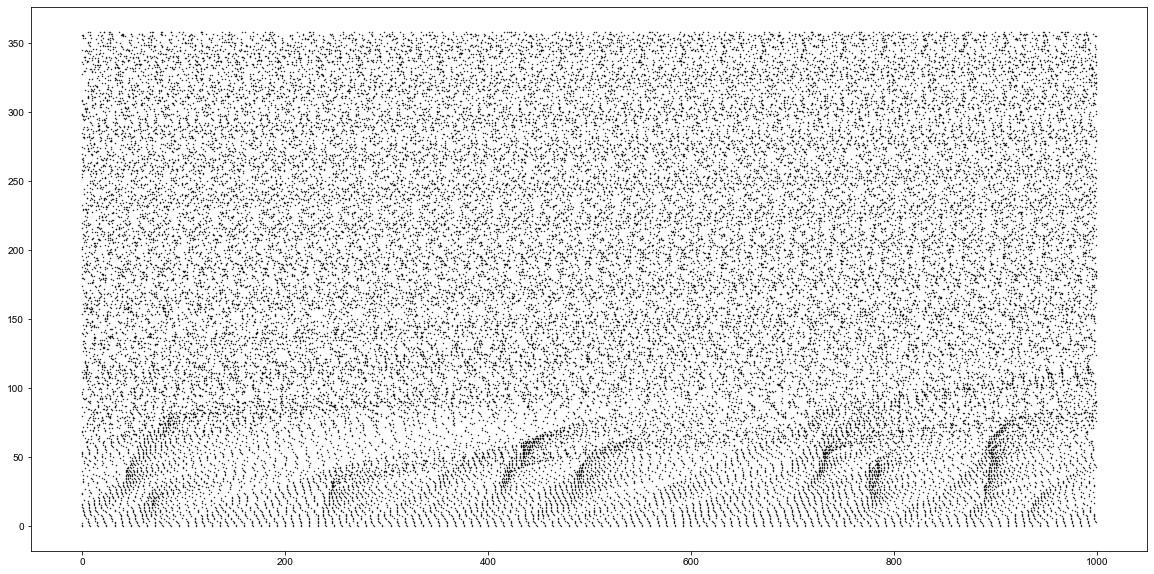

In [15]:
L=1*1000
ln=1
Circle=1
T=0.1*60*60
DT=3
Results=Simulation(L,ln,Circle,T,DT)